Q63. 네이버 검색에서 관심 주제와 기사 수를 입력하면 그만큼 출력하는 크롤링 프로그램을 작성하여 다음 사항을 수행하세요.

기사 제목과 링크를 데이터프레임으로 가져온 후 본문 내용에서 한글 단어만 출력하여 형태소 분석 최근 국내 'AI'와 관련하여 가장 많이 언급되는 단어에 대한 빈도분석 및 시각화 AI 분야에서의 유의할 만한 트랜드 정보 및 인사이트 도출

In [ ]:
#불용어처리 - 빈도분석 - 시각화 - 워드클라우드

In [ ]:
# url = https://search.naver.com/search.naver?where=news&sm=tab_jum&query=

## 네이버뉴스 + 개별신문사 코드 만들기 

In [ ]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
#     keyword = input('검색 키워드를 입력해주세요 ')
#     keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['제목','도서관','교육기간', '대상', '수강료']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://www.jeju.go.kr/lib/event/program/add.htm?organ=&rangeType=edu&range.start=2021-01-01&range.end=2021-12-31&joinStat=&title=&page='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

In [2]:
# 중복행 제거
dup = news_df.duplicated(['title'], keep='first')
dup

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [3]:
news_df = news_df.drop_duplicates(['title'], keep='first') # 첫번째만 남기기
news_df

,title,url
0,"전북도, 청년 스마트팜 육성에 10년간 858억원 투자",http://www.newsis.com/view/?id=NISX20220823_00...
1,"곡성군, 청년 행복 명사 초청 토크 콘서트",http://www.sportsseoul.com/news/read/1153237?r...
2,[단독]서울시 '역세권 청년주택' 또 잡음..이번엔 '입주 지연',http://www.fnnews.com/news/202208230933496624
3,"경기도일자리재단, 29일까지 ‘경기 청년 일자리 협업 표창’ 대상자 공모",https://www.news1.kr/articles/4780297
4,"버터나이프크루 청년들 ""여가부, 일방적 사업 폐지 사과해야""",https://www.yna.co.kr/view/AKR2022082307120053...
...,...,...
995,"김태흠 지사, 스마트 농업 확대로 ""돈 되는 농업·청년농업인 육성 실현""",http://www.aflnews.co.kr/news/articleView.html...
996,"경남도, 전국 최초 '청년어업인연합회' 출범",http://moneys.mt.co.kr/news/mwView.php?no=2022...
997,"인천시, '인천형 청년월세 지원 사업' 참여자 모집",https://www.gukjenews.com/news/articleView.htm...
998,"부천시, 청년월세 한시 특별지원사업 시행…'매월 20만원 지원'",https://www.news1.kr/articles/4773581


In [4]:
# 리스트 li에 항상 마지막 기사만 들어가게 되어있어서 그부분 수정했어요 

headers = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

import requests
import re 

def news_contents_crawler(news_url):
    li = []
    for i in news_url: 
        try:
            news = requests.get(i, headers=headers)
            news_html = BeautifulSoup(news.text,"html.parser")
        except:
            pass

        texts = news_html.find_all('p')

        for t in texts:
            text = t.get_text()
            text = re.sub('[^가-힣]+',' ', text)

            li.append(text)
            
    li = ' '.join(li)
    result = re.sub('\s{2,}', ' ', li)
    return result

news_li = news_df['url'].tolist()
result = news_contents_crawler(news_li)
result    

' 화 서울 지방 전북도 청년 스마트팜 육성에 년간 억원 투자 등록 기사내용 요약 인구감소지역에 정착하는 청년농에게 스마트팜 시설비 지원 전문가 컨설팅 기술교육 교류 모임 등 병행 안정적 정착 유도 전주 뉴시스 전라북도 스마트팜 현장 모습 재판매 및 금지 전주 뉴시스 전라북도 스마트팜 현장 모습 재판매 및 금지 무단 전재 및 재배포 금지 뉴시스 기획특집 중국 가 밀려온다 배터리주 시대 커지는 이자부담 오피니언 소설가 장강명 현실적인 경찰 이야기 쪽 읽힐까 걱정 최현호 기자 공매도 대책 효과적으로 작동하려면 뉴시스 윤석열 대통령 대심도 빗물터널 현장 점검 을지훈련 정부세종청사서 화학테러 가정 모의훈련 더위 그치는 절기 처서 지만 전국 무더위 계속 법카 유용 의혹 김혜경씨 경찰 출석 묵묵부답한 채 조사실로 이시간 핫 뉴스 오늘의 헤드라인 여의도 스킨십 넓히는 이달 말 비대위 만난다 윤석열 대통령이 일 중 용산 대통령실로 주호영 국민의힘 비상대책위원 등 비대위원들을 초청해 만찬을 가질 것으로 알려졌다 윤 대통령과 지난 일 꾸려진 여당 비대위와의 첫 공식 회동이다 대통령실 관계자는 일 뉴시스와의 통화에서 비대위가 꾸려진 만큼 대통령실로 초청하는 것으로 안다 며 날짜는 확정되지 않았지만 이달 중으로 할 거고 당국 개입에도 고삐 풀린 환율 원 턱밑 법카 의혹 김혜경 피의자로 경찰 출석 묵묵부답 강남 광화문 대심도 빗물터널 내년 설계 착수 상추 시 치 기대인플레 꺾였지만 체감물가 비명계 권리당원 전원투표에 이재명 당 넘어야 신군부 비유에 안전핀 뽑힌 수류탄 재유행 확산세 꺾였나 오후 시 만 명 확진 많이 본 기사 한혜진 폭우 피해 집 물난리 났다 모델 한혜진이 폭우 피해를 알렸다 한혜진은 일 인스타그램에 월 일 유튜브 채널에 화가 업로드 됩니다 많이 놀러오세요 라며 자신의 유튜브 채널 예고 영상을 올렸다 영상 속 한혜진은 보시다시피 저희 집이 물난리가 났다 며 모든 짐을 소파 위로 쌓아 올린 모습을 공개했다 최근 수도권에 기록적인 폭우가 쏟아지며 피해를 입은 것으로 보인다

In [5]:
!pip install konlpy wordcloud


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word=['청년', '지원', '경찰', '만원']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [8]:
# 한글폰트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [17]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
df

,index,cnt
0,월세,1299
1,사업,1294
2,이하,1182
3,소득,1164
4,신청,1145
...,...,...
9284,이혜인,1
9285,담양,1
9286,이병,1
9287,김부,1


In [18]:
data10 = df[:10]
data10

,index,cnt
0,월세,1299
1,사업,1294
2,이하,1182
3,소득,1164
4,신청,1145
5,경우,1002
6,가구,949
7,주택,904
8,기자,812
9,서비스,808


In [18]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 
df_stop_words = df_test.head(50) # 50번째로 많이 등장한 단어까지는 삭제(제가 임의로 정한 숫자라서 크롤링 결과 한번 확인해보시고 수정하시기..)
stop_word = df_stop_words['index'].tolist()

In [ ]:
stop_word = []   
add_stop = set(['청년'])

for a in add_stop:
    stop_word.append(a)

In [10]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [11]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
df

,index,cnt
0,청년,4551
1,지원,1875
2,경찰,1374
3,만원,1309
4,월세,1299
...,...,...
9288,이혜인,1
9289,담양,1
9290,이병,1
9291,김부,1


<AxesSubplot:xlabel='index', ylabel='cnt'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


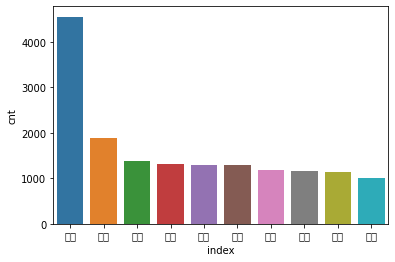

In [13]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')# 한글 폰트 설정

# 시각화
sns.barplot(x='index', y='cnt', data=data10, orient='v')

(-0.5, 3999.5, 2999.5, -0.5)

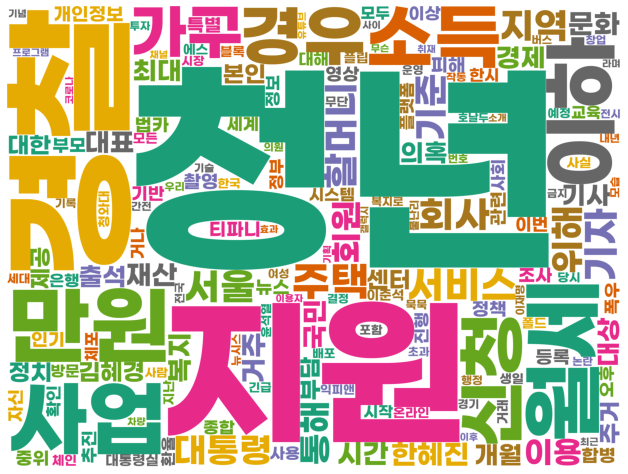

In [15]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=161).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기